<ipython-input-8-6d37819d111c>:19: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'TQ'
  woda.TX = T, 0
<ipython-input-8-6d37819d111c>:21: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'TQ'
  woda.TX = T, 1


Paliwo: CH4 , LHV: 50.025 MJ/kg, HHV: 55.511 MJ/kg
Paliwo: CH4 , LHV: 49.964 MJ/kg, HHV: 54.867 MJ/kg
Paliwo: CH4 , LHV: 49.915 MJ/kg, HHV: 54.021 MJ/kg
Paliwo: C3H8 , LHV: 46.352 MJ/kg, HHV: 50.343 MJ/kg
Paliwo: C3H8 , LHV: 46.304 MJ/kg, HHV: 49.871 MJ/kg
Paliwo: C3H8 , LHV: 46.277 MJ/kg, HHV: 49.265 MJ/kg
Paliwo: H2 , LHV: 119.952 MJ/kg, HHV: 141.780 MJ/kg
Paliwo: H2 , LHV: 120.462 MJ/kg, HHV: 139.971 MJ/kg
Paliwo: H2 , LHV: 120.952 MJ/kg, HHV: 137.290 MJ/kg
Paliwo: C2H6 , LHV: 47.511 MJ/kg, HHV: 51.901 MJ/kg
Paliwo: C2H6 , LHV: 47.451 MJ/kg, HHV: 51.375 MJ/kg
Paliwo: C2H6 , LHV: 47.413 MJ/kg, HHV: 50.699 MJ/kg


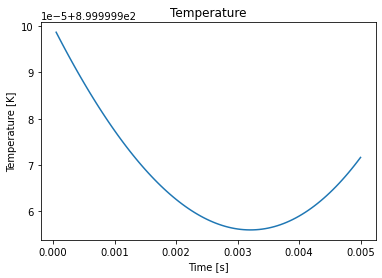

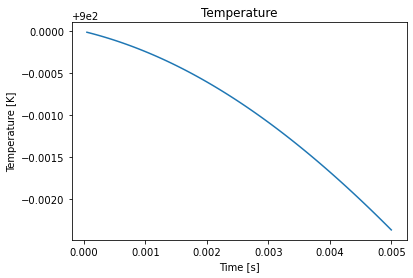

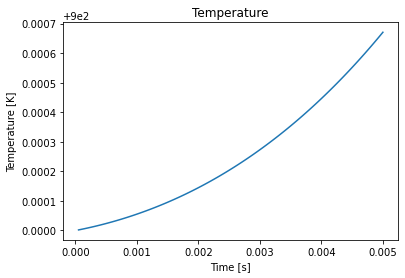

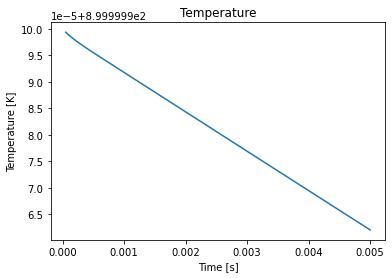

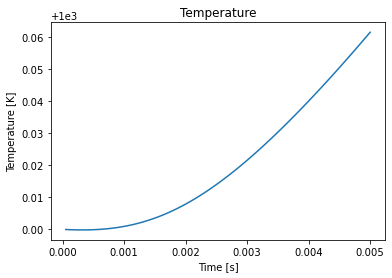

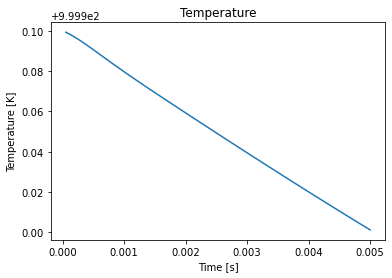

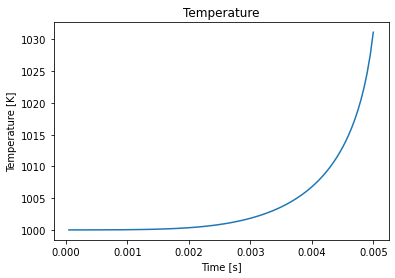

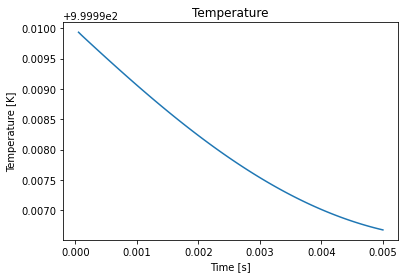

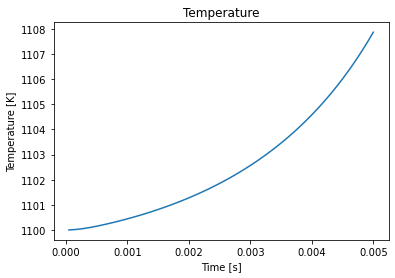

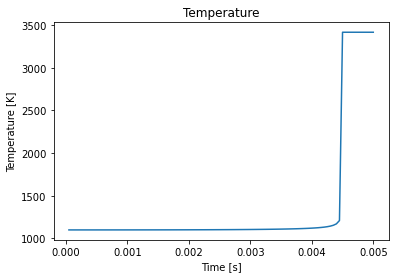

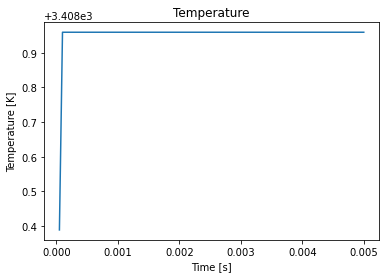

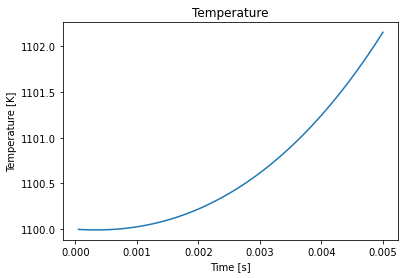

In [14]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import sys

##Deklaracja mieszanin mechanizmem gri30

fuel= ct.Solution('gri30.cti')
products = ct.Solution('gri30.cti')
gas = ct.Solution('gri30.cti')
fuel_1 = ct.Solution('gri30.xml')
fuel_2 = ct.Solution('gri30.xml')
fuel_3 = ct.Solution('gri30.xml')
fuel_4 = ct.Solution('gri30.xml')

def heating_value (fuel, T, p):                     ## Funkcja wyliczająca Ciepło spalania paliwa LHV i HHV
    
    woda = ct.Water()
    woda.TX = T, 0
    h_ciecz = woda.h
    woda.TX = T, 1
    h_gas= woda.h
    
    gas.TP = T, p
    gas.set_equivalence_ratio(1.0, fuel, 'O2:1.0')
    h1 = gas.enthalpy_mass
    Y_fuel = gas[fuel].Y[0]
    
    Y_products = {'CO2': gas.elemental_mole_fraction('C'),
                  'H2O': 0.5 * gas.elemental_mole_fraction('H'),
                  'N2': 0.5 * gas.elemental_mole_fraction('N')}

    gas.TPX = T,p, S_products
    Y_H2O = gas['H2O'].Y[0]
    h2 = gas.enthalpy_mass
    LV = -(h2-h1)/Y_fuel
    HV = -(h2-h1 + (h_ciecz-h_gas) * Y_H2O)/Y_fuel
    LV=LV/1000000
    HV=HV/1000000
    print ('Fuel: %s , LHV: %.3f MJ/kg, HHV: %.3f MJ/kg' %(mieszanka, LV, HV))

def temp (m):                                 ## Funkcja wyliczająca temperature spalania w czasie 
    wyniki = open('wyniki_mkws.txt', 'w')
    wyniki.write('%5s\t%10s\t%10s\n' % ('L.p.', 't [s]', 'T [K]'))

    r = ct.IdealGasConstPressureReactor(m)

    sim = ct.ReactorNet([r])
    time = 0.0
    states = ct.SolutionArray(m, extra=['t'])

    ##print('%10s %10s' % ('t [s]','T [K]'))
    for n in range(100):
        time += 0.00005
        sim.advance(time)
        states.append(r.thermo.state, t=time)
        ##print('%5d %10.3f %10.3f' % (n,time, r.T))
    wyniki.close()
    ##print (r.kinetics.n_reactions)
#print (states.u)
#matplotlib
    plt.figure()
    plt.plot(states.t, states.T)
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature [K]')
    plt.title('Temperature')

## deklaracja warunków początkowych 1,2 i 3

T1=298
p1=101325
T2=400
p2=2.5*p1
T3=500
p3=5*p1

## deklaracja mieszaniny_1 metanu z tlenem

mieszanina_1.TPX = T1,p1, 'CH4:1, O2:2'

## wyliczenie ciepła spalania dla 3 różnych warunków początkowych
cieplo('CH4',T1,p1)
cieplo('CH4',T2,p2)
cieplo('CH4',T3,p3)


## deklaracja mieszaniny_2 propanu z tlenem 
mieszanina_2.TPX = T1, p1, 'C3H8:1, O2:5'

cieplo('C3H8',T1,p1)
cieplo('C3H8',T2,p2)
cieplo('C3H8',T3,p3)


## deklaracja mieszaniny_3 wodoru z tlenem 
mieszanina_3.TPX = T1, p1, 'H2:2, O2:1'

cieplo('H2',T1,p1)
cieplo('H2',T2,p2)
cieplo('H2',T3,p3)


mieszanina_4.TPX = T1, p1, 'C2H6:2, O2:7'

cieplo('C2H6',T1,p1)
cieplo('C2H6',T2,p2)
cieplo('C2H6',T3,p3)

## Wyliczenie temperatury spalania na podstawie reaktora o stałym ciśnieniu oraz przedstawienie wyników na wykresie

T1=900
p1=101325
T2=1000
p2=2.5*p1
T3=1100
p3=5*p1

mieszanina_1.TPX = T1,p1, 'CH4:1, O2:2'
mieszanina_2.TPX = T1, p1, 'C3H8:1, O2:5'
mieszanina_3.TPX = T1, p1, 'H2:2, O2:1'
mieszanina_4.TPX = T1, p1, 'C2H6:2, O2:7'
temp(mieszanina_1)
temp(mieszanina_2)
temp(mieszanina_3)
temp(mieszanina_4)

mieszanina_1.TP = T2, p2
mieszanina_2.TP = T2, p2
mieszanina_3.TP = T2, p2
mieszanina_4.TP = T2, p2

temp(mieszanina_1)
temp(mieszanina_2)
temp(mieszanina_3)
temp(mieszanina_4)

mieszanina_1.TP = T3, p3 
mieszanina_2.TP = T3, p3 
mieszanina_3.TP = T3, p3
mieszanina_4.TP = T3, p3

temp(mieszanina_1)
temp(mieszanina_2)
temp(mieszanina_3)
temp(mieszanina_4)